In [ ]:
# linear algebra
import numpy as np

# data processing
import pandas as pd

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/adult.csv")
dataset.shape

(32561, 15)

In [ ]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# **Data Preprocessing**

In [ ]:
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1})


In [ ]:
dataset['occupation'].describe()

count              32561
unique                15
top       Prof-specialty
freq                4140
Name: occupation, dtype: object

In [ ]:
dataset = dataset.replace('?',np.nan )

In [ ]:
dataset['occupation'] = dataset['occupation'].fillna('Prof-specialty')

In [ ]:
dataset['workclass'].describe()


count       30725
unique          8
top       Private
freq        22696
Name: workclass, dtype: object

In [ ]:
dataset['workclass'] = dataset['workclass'].fillna('Private')

In [ ]:
dataset['native.country'].describe()

count             31978
unique               41
top       United-States
freq              29170
Name: native.country, dtype: object

In [ ]:
dataset['native.country'] = dataset['native.country'].fillna('United-States')

In [ ]:

dataset.describe(include=["O"])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,24532,10501,14976,5983,13193,27816,21790,29753


In [ ]:
dataset.drop(['fnlwgt'], axis = 1, inplace = True)

In [ ]:
Dataset = dataset.copy()

In [ ]:
Dataset['age'] = pd.cut(Dataset['age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

In [ ]:
Dataset['Hourse per Week'] = pd.cut(Dataset['hours.per.week'], bins = (0,30,40,100), labels=['Lesser Hours', 'Normal Hours', 'Extra Hours'])

<Axes: xlabel='income', ylabel='count'>

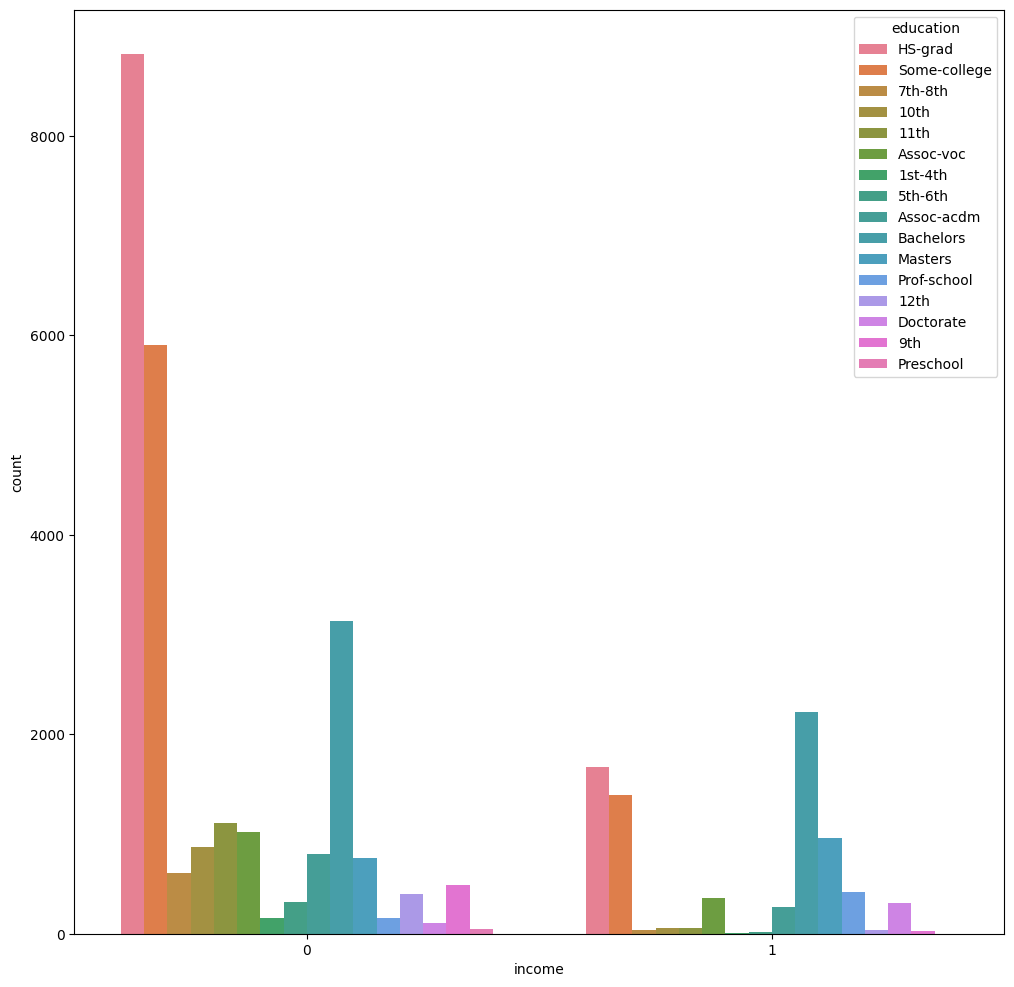

In [ ]:
sns.countplot(x = 'income', hue = 'education', data = Dataset)

In [ ]:
dataset.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Hourse per Week
0,Old,Private,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0,Normal Hours
1,Old,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,Lesser Hours
2,Old,Private,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0,Normal Hours
3,Old,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,Normal Hours
4,Adult,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,Normal Hours
